### Lending Club: a default ratio prediction study

* [1. Background](#Background)
* [2. Importing required packages](#Import)
* [3. Loading the data](#Load)
* [4. Distribution of Loan status](#Status)
* [5. Is Charged Off similar to Default?](#ChargedOff)
* [6. Combining charged off and default loans](#combine)
* [7. Exploring effects of different featurs on loan status distribution](#explore)
    * [7.1. Loan status distribution in each year](#year)
    * [7.2. Loan status distribution vs grade](#grade)
    * [7.3. Loan status distribution vs home ownership](#home)
    * [7.4. Loan status distribution vs employment length](#empl)
    * [7.5. Loan status distribution vs annual income ](#income)
    * [7.6. Loan status distribution vs low and high ranges of Fico score](#Fico)
    * [7.7. Loan status distribution vs installment, interest rate and loan amount ](#installment)
    * [7.8. Loan status distribution vs previous charged off, banckruptcies, collections and tax liens](#tax)
    * [7.9. Loan status distribution vs utilization rate, revolving balance and inquires within 6 month of loan application](#util)
    * [7.10. Loan status distribution vs number of open accounts, mortages and number of revolving accounts](#account)
    * [7.11. Loan status distribution vs earliest credit](#earliest)
    * [7.12. DTI](#dti)
* [8. Does residential state of an applicant affect his/her performance?](#state)
* [9. PCA](#pca)
* [10. Summary](#summary)



## 1. Background <a class='anchor' id='Background'></a>

LendingClub used to be the biggest peer to peer lending platform until 2020, when they changed their business focus. During its operation, LendingClub would establish a platform for borrowers and investors where borrowers were allowed to create loan requests on its website. They were also required to provide their information like credit score, credit history, desired loan amount and the debt-to-income ratio. Based on the data, LendingClub would decide if the loan request would be accepted and what the interest rate would be. 

The data is from Kaggle website and can be found [here.](https://www.kaggle.com/wordsforthewise/lending-club) 

The original data file of the accepted loans has 151 columns and more than 2 million rows. During the data wrangling process, any columns that was not established prior to the decision was dropped. The focus is on the single applicants, therefore, join applications were also dropped. Histograms of the distributions of features did not show any abnormalities. 

In order to find out probable correlation between default and applicant's status, we will explore our data. Several questions including the following will be investigated: 
Loan status distribution across states and if an applicant's state of residence affects the fate of a loan
Loan status distribution vs home ownership and annual income
Loan status distribution vs the applicant's credit history such as credict score, previous bankruptcies and etc.

## 2. Importing required packages <a class='anchor' id='Import'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## 3. Loading the data <a class='anchor' id='Load'></a>

In [2]:
# Loading the data:

path = "C:\\Users\\somfl\\Documents\\Data Science Career Track\\LendingClub\\TruncatedData.csv"
df = pd.read_csv(path, sep='\t')


In [3]:
# Dropping the unnamed column
df = df.drop('Unnamed: 0', axis=1)

## 4. Distribution of Loan status <a class='anchor' id='Status'></a>

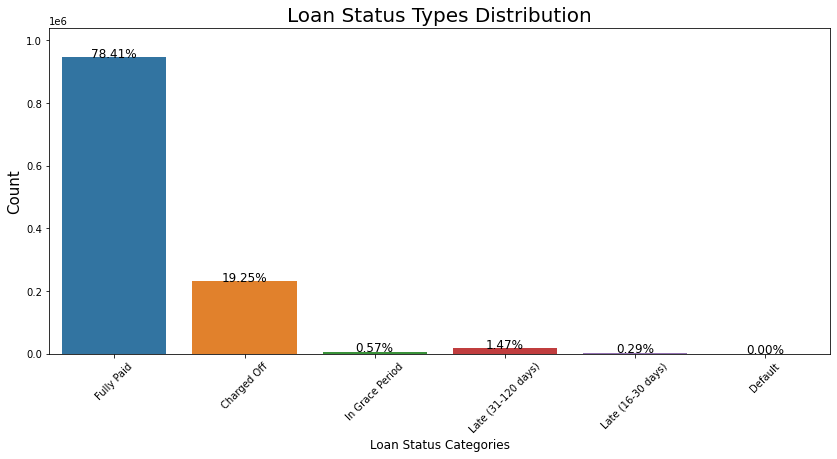

In [9]:
total = len(df)

plt.figure(figsize = (14,6))

ax = sns.countplot(x="loan_status", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_xlabel("Loan Status Categories", fontsize=12)
ax.set_ylabel("Count", fontsize=15)
ax.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
ax.set_ylim(0, max(sizes) * 1.10)

plt.show()

## 5. Is Charged Off similar to Default? <a class='anchor' id='ChargedOff'> </a>

As it is shown in the above graph only a very small number of loans are default. A question that is raised by looking at the graph is what charged ff means. A google search led us to the [lending club webpage](https://help.lendingclub.com/hc/en-us/articles/216127747-What-is-the-difference-between-a-loan-that-is-in-default-and-a-loan-that-has-been-charged-off-#:~:text=What%20is%20the%20difference%20between%20a%20loan%20that,no%20longer%20a%20reasonable%20expectation%20of%20further%20payments) . Briefly, a default is when the borower is late and charged off happens when the creditors gives up hope on getting the loan back. So default is the beginning of the process which may or may not lead to charge off. 
To investigate deeper, the original data was loaded and default and charged-off loans were compared. New data frames of deafulted and charged-off loans were created. for these loans, the expected return money was estimated by using the funded amount, interest rate and terms. The expected amount was compared with the total payment. 
In both defaulted and charged off loans, the borrower has failed to pay back the loan. For the defaulte|d loans, the recoveries (which is collected through debt collection or etc after the settlement) are all zero. For charged off loans there are some loans which has recoveries. Only in one case the amount of recoveries is bigger than the expected return. The extra return should happen due to late fees. 

In [5]:
dfCheck = pd.read_csv("C:\\Users\\somfl\\Documents\\Data Science Career Track\\LendingClub\\accepted_2007_to_2018Q4.csv")

C:\Users\somfl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
dfCheck.loc[dfCheck['loan_status']=='Fully Paid', ['total_pymnt', 'funded_amnt', 'loan_amnt', 'installment', 'int_rate', 'term', 'recoveries']]

,total_pymnt,funded_amnt,loan_amnt,installment,int_rate,term,recoveries
0,4421.723917,3600.0,3600.0,123.03,13.99,36 months,0.0
1,25679.660000,24700.0,24700.0,820.28,11.99,36 months,0.0
2,22705.924294,20000.0,20000.0,432.66,10.78,60 months,0.0
4,11740.500000,10400.0,10400.0,289.91,22.45,60 months,0.0
5,13708.948530,11950.0,11950.0,405.18,13.44,36 months,0.0
...,...,...,...,...,...,...,...
2260684,15908.001163,15000.0,15000.0,487.47,10.49,36 months,0.0
2260686,29818.871195,23800.0,23800.0,559.85,14.49,60 months,0.0
2260688,20756.233632,18000.0,18000.0,377.95,9.49,60 months,0.0
2260690,35848.764532,29400.0,29400.0,683.94,13.99,60 months,0.0


In [7]:
dfDef = dfCheck.loc[dfCheck['loan_status']=='Charged Off', ['total_pymnt', 'funded_amnt', 'loan_amnt', 'id', 'int_rate', 'term', 'recoveries']]
dfDef.sample(10)

,total_pymnt,funded_amnt,loan_amnt,id,int_rate,term,recoveries
585813,10925.48,30000.0,30000.0,115389794,30.99,60 months,0.00
934094,14700.47,28325.0,28325.0,108105961,15.05,36 months,4839.04
67171,21440.36,30000.0,30000.0,64923118,15.41,60 months,12129.39
2085221,2169.88,6400.0,6400.0,121806135,13.59,36 months,0.00
125359,2922.58,15000.0,15000.0,61468276,17.57,60 months,2197.04
1735057,6929.77,12800.0,12800.0,96246771,13.49,36 months,0.00
360580,3444.54,14000.0,14000.0,41850302,8.18,36 months,785.12
1139902,14964.65,17225.0,17225.0,34813228,24.99,60 months,1364.52
95178,2165.79,6000.0,6000.0,63044555,8.18,36 months,469.67
1307729,5166.57,4175.0,4175.0,13156099,24.08,36 months,83.19


In [8]:
dfDef['diff'] = dfDef['total_pymnt'] - dfDef['loan_amnt']*((100+dfDef['int_rate'])/100)**(36/12)
dfDef.loc[dfDef['diff']>0].sort_values(by = ['diff'])

,total_pymnt,funded_amnt,loan_amnt,id,int_rate,term,recoveries,diff
2258284,23439.24,10800.0,10800.0,90835542,19.99,36 months,23439.24,4781.505211


In [9]:
dfDef2 = dfCheck.loc[dfCheck['loan_status']=='Default', ['total_pymnt', 'funded_amnt', 'loan_amnt', 'id', 'int_rate', 'term', 'recoveries']]
dfDef2['diff'] = dfDef2['total_pymnt'] - dfDef2['loan_amnt']*((100+dfDef2['int_rate'])/100)**(36/12)
dfDef2.sample(10)

,total_pymnt,funded_amnt,loan_amnt,id,int_rate,term,recoveries,diff
2122814,884.30,2000.0,2000.0,119976809,14.08,36 months,0.0,-2085.030459
693239,4302.76,4000.0,4000.0,79074327,11.47,36 months,0.0,-1237.549094
2215128,17715.10,20025.0,20025.0,92272002,17.99,36 months,0.0,-15178.251666
2182722,20278.66,22950.0,22950.0,93700651,30.74,36 months,0.0,-31008.438694
1524260,2263.81,15000.0,15000.0,133794246,17.47,60 months,0.0,-22051.071946
2197699,4178.41,5500.0,5500.0,94155408,7.49,36 months,0.0,-2652.316209
1207115,13942.05,12000.0,12000.0,24776849,12.49,60 months,0.0,-3139.331655
487676,6832.88,25000.0,25000.0,128147895,21.45,60 months,0.0,-37952.118716
550732,15962.10,20000.0,20000.0,118632698,25.82,60 months,0.0,-23874.204027
1654996,4635.14,5400.0,5400.0,103518799,25.49,36 months,0.0,-6036.253088


In [10]:
dfDef2['recoveries'].value_counts()

0.0    40
Name: recoveries, dtype: int64

## 6. Combining charged off and default loans and dropping current loans <a  class='anchor' id='combine'></a>

As discussed earlier, charged off and default both refe to a borrower's failiure to return the loan. Therefore, the two status can be combined. Also, loans with _Current_ status, cannot be used in training models, therefore, they will be dropped. After making the changes to the status, a countplot of the loan status is plotted again.

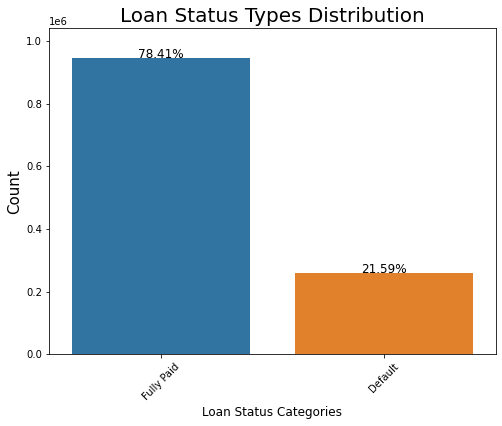

In [251]:
# Defining a new column 'new_status' and combine 'Charged Off' and 'Default' as well as any 'late' loans into one status

df['new_status'] = df['loan_status']
df.loc[df['loan_status']=='Late (31-120 days)', 'new_status'] = 'Default'
df.loc[df['loan_status']=='In Grace Period', 'new_status'] = 'Default'
df.loc[df['loan_status']=='Late (16-30 days)', 'new_status'] = 'Default'
df.loc[df['loan_status']=='Charged Off', 'new_status'] = 'Default'

#Dropping loans which are 'Current'

s = df[df['loan_status']=='Current'].index
df.drop(s, inplace=True)
total = len(df)

plt.figure(figsize = (8,6))

ax = sns.countplot(x="new_status", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_xlabel("Loan Status Categories", fontsize=12)
ax.set_ylabel("Count", fontsize=15)
ax.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
ax.set_ylim(0, max(sizes) * 1.10)

plt.show()

After making the changes to the status, a countplot of the loan status is plotted again. 

## 7. Exploring effects of different featurs on loan status distribution <a class='anchor' id='explore'></a>

Now that the data is divided into two categories: Fully-paid and Default, we can start exploring the effect of different features on loans.

### 7.1.  Loan status distribution in each year <a class='anchor' id='year'></a>

To find out how loans distributed through year, loans are categorized according to the year they are issued. As shown in the following figure, 2015 has the highest number of issued loans.

<ipython-input-109-da90dbcf6ba0>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(s.index)


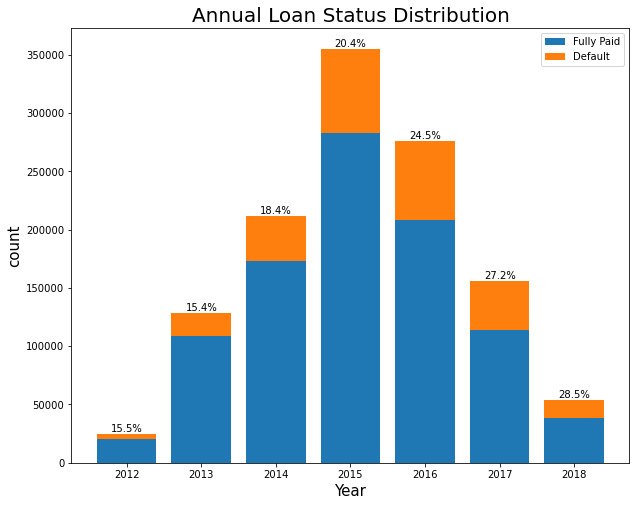

In [109]:
defaulL= df.loc[df['new_status']=='Default', ['issue_year']].value_counts()
fullL= df.loc[df['new_status']=='Fully Paid', ['issue_year']].value_counts()

s = pd.DataFrame({'Fully Paid': fullL, 'Default': defaulL})
s['Total'] = s['Default'] + s['Fully Paid']

s.index = ['2012', '2013', '2014', '2015', '2016', '2017', '2018']

fig, ax = plt.subplots(figsize=(10,8))
ax.bar(s.index, s['Fully Paid'])
ax.bar(s.index, s['Default'], bottom=s['Fully Paid'])
ax.set_xticklabels(s.index)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.legend(['Fully Paid', 'Default'])
ax.set_title("Annual Loan Status Distribution", fontsize=20)

s_total=s['Total']
s = s.iloc[:, 0:2]
s_rel = s.div(s_total, 0)*100
n = 'Default'
for i, (cs, pc) in enumerate(zip(s.cumsum(1)[n], s_rel[n])):
    plt.text(i, cs, str(np.round(pc, 1)) + '%', va='bottom', ha='center')

plt.show()

### 7.2. Loan status distribution vs grade <a class='anchor' id='grade'></a>

There are 35 grades for loans starting from A1 and ending in G5. More details about grades can be found [here](https://www.lendingclub.com/foliofn/rateDetail.action). But briefly, the higher the grade is, the riskier the loan will be. Loan distribution vs grade is shown below.  

<ipython-input-470-90e1bf9eb17e>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(s.index, rotation=90)


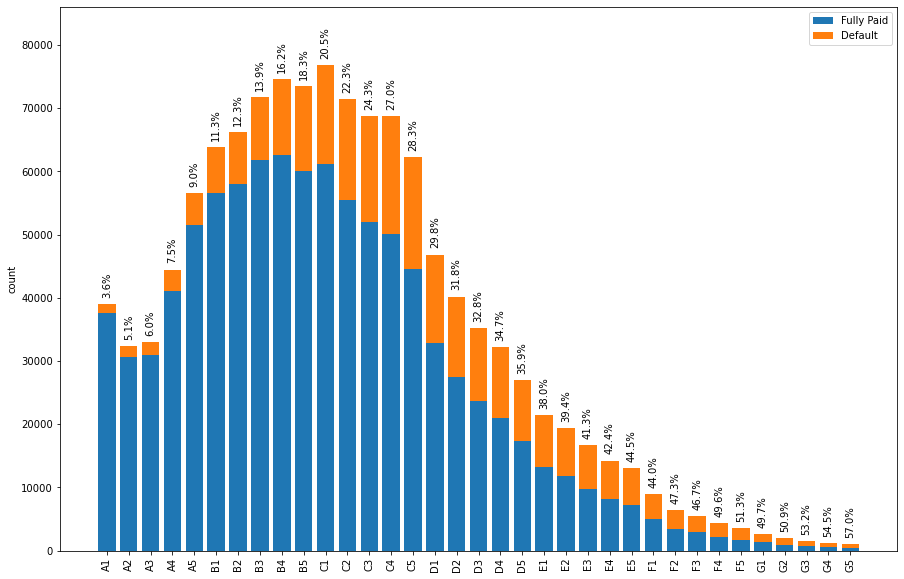

In [470]:
s = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', ['sub_grade']].value_counts(), 'Default': df.loc[df['new_status']=='Default', ['sub_grade']].value_counts()})
s.index=['A1','A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
                                            'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
                                            'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']
s['Total'] = s['Default'] + s['Fully Paid']
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(s.index, s['Fully Paid'])
ax.bar(s.index, s['Default'], bottom=s['Fully Paid'])
ax.set_xticklabels(s.index, rotation=90)
ax.set_ylabel('count')
ax.legend(['Fully Paid', 'Default'])
ax.set_ylim(0,86000)

s_total=s['Total']
s = s.iloc[:, 0:2]
s_rel = s.div(s_total, 0)*100

n = 'Default'
for i, (cs, pc) in enumerate(zip(s.cumsum(1)[n], s_rel[n])):
    plt.text(i, cs+1000 , str(np.round(pc,1)) + '%', va='bottom', ha='center', rotation=90)
#plt.subplots_adjust(hspace = 5,top = 1.2)
plt.show()

### 7.3. Loan status distribution vs home ownership <a class='anchor' id='home' ></a>

Home ownership is also one of the features which is used to make decision on a loan application. Below the distribution of loan status vs the applicants' home type is shown.

<ipython-input-230-6f59261e02d2>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(s.index, rotation=45)


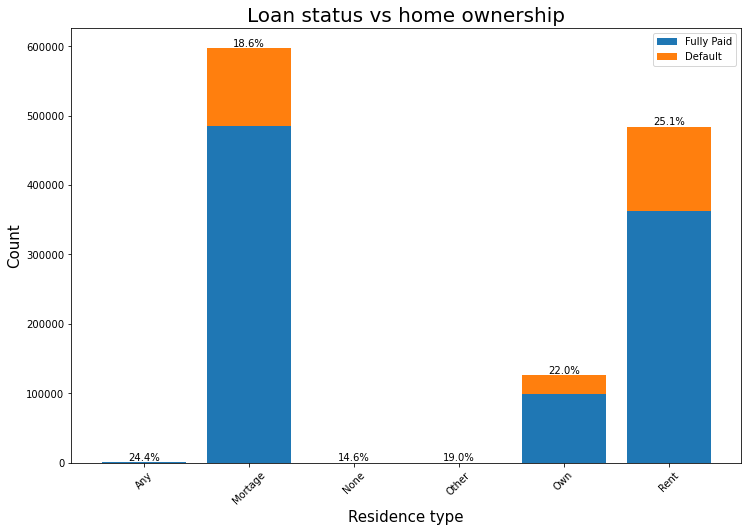

In [230]:
s = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', ['home_ownership']].value_counts(), 'Default': df.loc[df['new_status']=='Default', ['home_ownership']].value_counts()})
s['Total'] = s['Default'] + s['Fully Paid']
s.index=[ 'Any', 'Mortage', 'None', 'Other', 'Own', 'Rent']
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(s.index, s['Fully Paid'])
ax.bar(s.index, s['Default'], bottom=s['Fully Paid'])
ax.set_xticklabels(s.index, rotation=45)
ax.legend(['Fully Paid', 'Default'])
ax.set_xlabel('Residence type', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title("Loan status vs home ownership", fontsize=20)


s_total=s['Total']
s = s.iloc[:, 0:2]

s_rel = s.div(s_total, 0)*100

n = 'Default'
for i, (cs, pc) in enumerate(zip(s.cumsum(1)[n], s_rel[n])):
    plt.text(i, cs, str(np.round(pc, 1)) + '%', va='bottom', ha='center')

plt.show()                      

### 7.4. Loan status distribution vs employment length <a class='anchor' id='empl' ></a>

<ipython-input-231-60fb2f82ba8b>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(s.index, rotation=45)


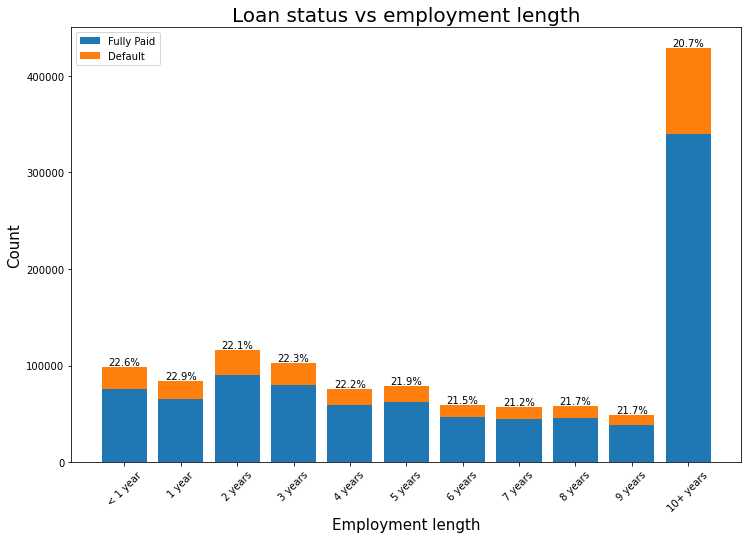

In [231]:
s = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', ['emp_length']].value_counts(), 'Default': df.loc[df['new_status']=='Default', ['emp_length']].value_counts()})
listIndex = s.index

new = []
for item in listIndex:
    new.append(''.join(item))
s.index = new

s = s.reindex(['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years',
    '7 years', '8 years', '9 years', '10+ years'])

s['Total'] = s['Default'] + s['Fully Paid']

fig, ax = plt.subplots(figsize=(12,8))
ax.bar(s.index, s['Fully Paid'])
ax.bar(s.index, s['Default'], bottom=s['Fully Paid'])
ax.set_xticklabels(s.index, rotation=45)
ax.legend(['Fully Paid', 'Default'])
ax.set_xlabel('Employment length', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title("Loan status vs employment length", fontsize=20)


s_total=s['Total']
s = s.iloc[:, 0:2]
s_rel = s.div(s_total, 0)*100

n = 'Default'
for i, (cs, pc) in enumerate(zip(s.cumsum(1)[n], s_rel[n])):
    plt.text(i, cs, str(np.round(pc, 1)) + '%', va='bottom', ha='center')

plt.show()

### 7.5. Loan status distribution vs annual income <a class='anchor' id='income'></a>

The effect of applicant's annual income is shown below. In both defaulted and fully paid loans, the applicants annual income are almost similar.  

Text(0, 0.5, 'Count')

<Figure size 432x288 with 0 Axes>

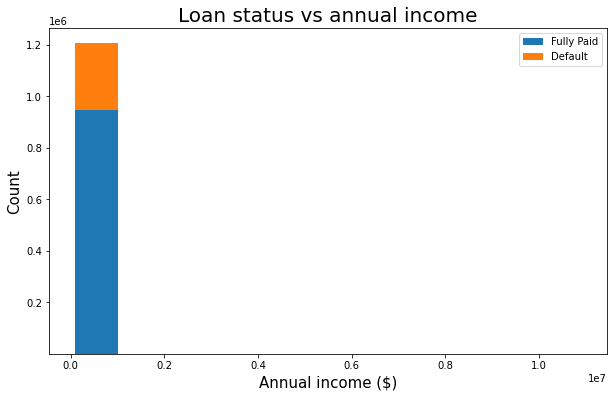

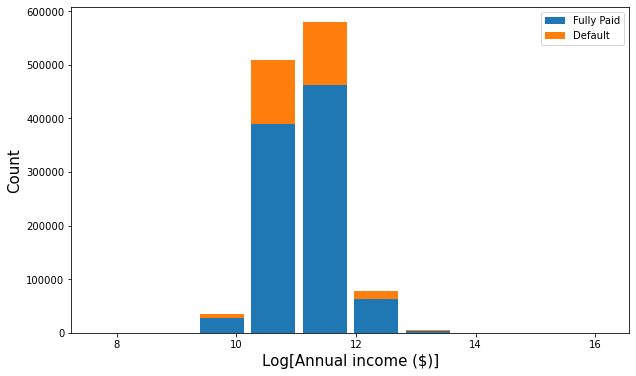

In [420]:
s1 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'annual_inc'], 'Default': df.loc[df['new_status']=='Default', 'annual_inc']}, index=None)
s2 = np.log(s1)

fig, axes = plt.subplots(1,2) # create 2*1 array of subplots
fig.clf()
axes[0] = s1.plot.hist(stacked=True, bins=10, rwidth=0.85, figsize=(10, 6))
axes[1] = s2.plot.hist(stacked=True, bins=10, rwidth=0.85, figsize=(10, 6))

#axes[0].set_xticklabels(s.index, rotation=45)
axes[0].legend(['Fully Paid', 'Default'])
axes[0].set_xlabel('Annual income ($)', fontsize=15)
axes[0].set_ylabel('Count', fontsize=15)
axes[0].set_title("Loan status vs annual income", fontsize=20)
axes[1].set_xlabel('Log[Annual income ($)]', fontsize=15)
axes[1].set_ylabel('Count', fontsize=15)


### 7.6. Loan status distribution vs Fico score <a class='anchor' id='Fico'></a>

[Fico score](https://www.consumerfinance.gov/ask-cfpb/what-is-a-fico-score-en-1883/) is also one important factor to decide about a loan application. As shown below, Fully  paid loans have higher scores comapred to defaulted loans.

<Figure size 432x288 with 0 Axes>

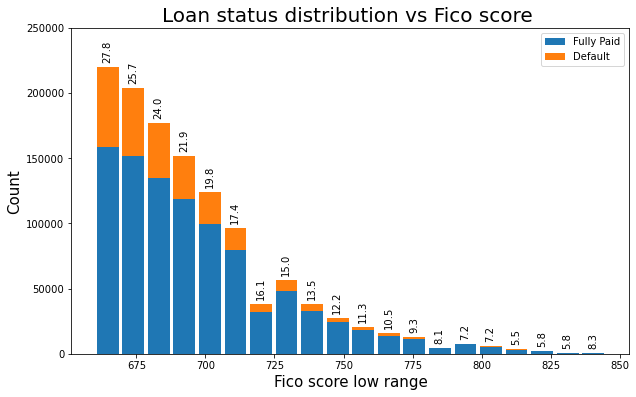

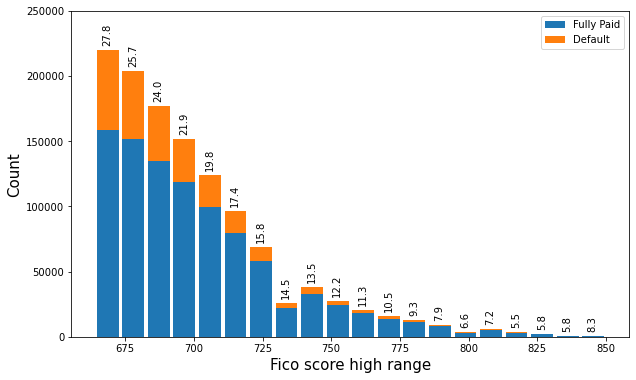

In [466]:
s1 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'fico_range_low'], 'Default': df.loc[df['new_status']=='Default', 'fico_range_low']}, index=None)
s2 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'fico_range_high'], 'Default': df.loc[df['new_status']=='Default', 'fico_range_high']}, index=None)

fig, axes = plt.subplots(2,1) # create 3*1 array of subplots
fig.clf()
axes[0] = s1.plot.hist(stacked=True, bins=20, rwidth=0.85, figsize=(10, 6))
axes[1] = s2.plot.hist(stacked=True, bins=20, rwidth=0.85, figsize=(10, 6))

axes[0].legend(['Fully Paid', 'Default'])
axes[0].set_xlabel('Fico score low range', fontsize=15)
axes[0].set_ylabel('Count', fontsize=15)
axes[0].set_title("Loan status distribution vs Fico score ", fontsize=20)
axes[0].set_ylim(0,250000)

axes[1].legend(['Fully Paid', 'Default'])
axes[1].set_xlabel('Fico score high range', fontsize=15)
axes[1].set_ylabel('Count', fontsize=15)
axes[1].set_ylim(0,250000)

p = axes[0].patches
for i in range(0,20,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1 + 2
    Y1 = p[i].get_height()
    Y2 = p[i+20].get_height()
    y = Y2 + Y1 + 5000
    a = Y2/(Y2 + Y1)
    axes[0].text(x, y, round(a*100,1), rotation=90)
    
p = axes[1].patches
for i in range(0,20,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1 + 2
    Y1 = p[i].get_height()
    Y2 = p[i+20].get_height()
    y = Y2 + Y1 + 5000
    a = Y2/(Y2 + Y1)
    axes[1].text(x, y, round(a*100,1), rotation=90)

### 7.7. Loan status distribution vs installment, interest rate and loan amount <a class='anchor' id='installment'></a>

The effect of the loan amount, interest rate, installment and loans' term are shown below. Loan amount is the amount of money that a borrower asks for, while installment and interst rates and term are factors which are determined by Lending Club. It seems that loans with higher amounts that result in higher installment and longer terms are riskier.

<Figure size 432x288 with 0 Axes>

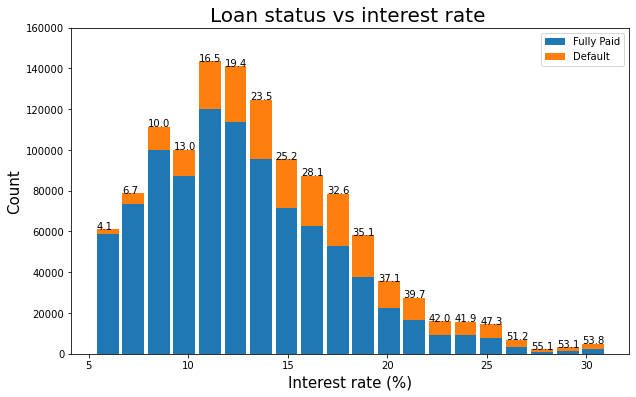

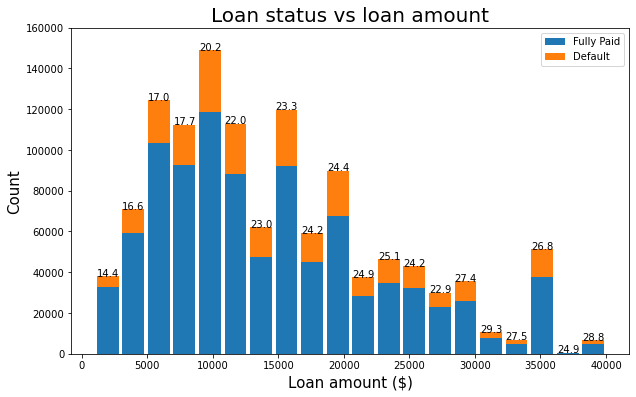

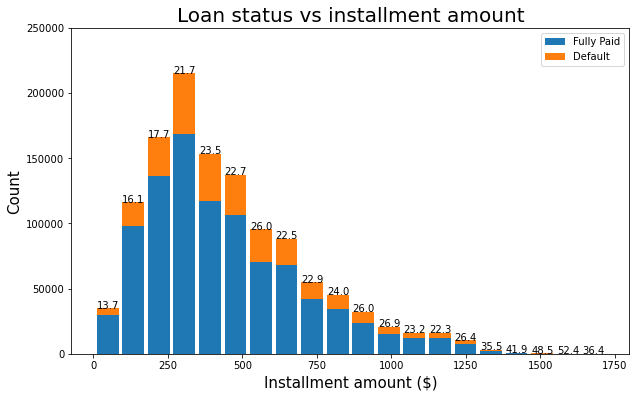

In [465]:
s1 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'int_rate'], 'Default': df.loc[df['new_status']=='Default', 'int_rate']}, index=None)
s2 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'funded_amnt'], 'Default': df.loc[df['new_status']=='Default', 'funded_amnt']}, index=None)
s3 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'installment'], 'Default': df.loc[df['new_status']=='Default', 'installment']})

fig, axes = plt.subplots(3,1) # create 3*1 array of subplots
fig.clf()
axes[0] = s1.plot.hist(stacked=True, bins=20, rwidth=0.85, figsize=(10, 6))
axes[1] = s2.plot.hist(stacked=True, bins=20, rwidth=0.85, figsize=(10, 6))
axes[2] = s3.plot.hist(stacked=True, bins=20, rwidth=0.85, figsize=(10, 6))

axes[0].legend(['Fully Paid', 'Default'])
axes[0].set_xlabel('Interest rate (%)', fontsize=15)
axes[0].set_ylabel('Count', fontsize=15)
axes[0].set_title("Loan status vs interest rate ", fontsize=20)
axes[0].set_ylim(0,160000)

axes[1].legend(['Fully Paid', 'Default'])
axes[1].set_xlabel('Loan amount ($)', fontsize=15)
axes[1].set_ylabel('Count', fontsize=15)
axes[1].set_title('Loan status vs loan amount', fontsize=20)
axes[1].set_ylim(0,160000)

axes[2].legend(['Fully Paid', 'Default'])
axes[2].set_xlabel('Installment amount ($)', fontsize=15)
axes[2].set_ylabel('Count', fontsize=15)
axes[2].set_title('Loan status vs installment amount', fontsize=20)
axes[2].set_ylim(0,250000)

p = axes[0].patches
for i in range(0,20,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1 
    Y1 = p[i].get_height()
    Y2 = p[i+20].get_height()
    y = Y2 + Y1 
    a = Y2/(Y2 + Y1)
    axes[0].text(x, y, round(a*100,1), rotation=0)
    
p = axes[1].patches
for i in range(0,20,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1 
    Y1 = p[i].get_height()
    Y2 = p[i+20].get_height()
    y = Y2 + Y1 
    a = Y2/(Y2 + Y1)
    axes[1].text(x, y, round(a*100,1), rotation=0)
    
p = axes[2].patches
for i in range(0,20,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1 
    Y1 = p[i].get_height()
    Y2 = p[i+20].get_height()
    y = Y2 + Y1 
    a = Y2/(Y2 + Y1)
    axes[2].text(x, y, round(a*100,1), rotation=0)
    
    

<ipython-input-463-e48319f14ee2>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(s.index, rotation=45)


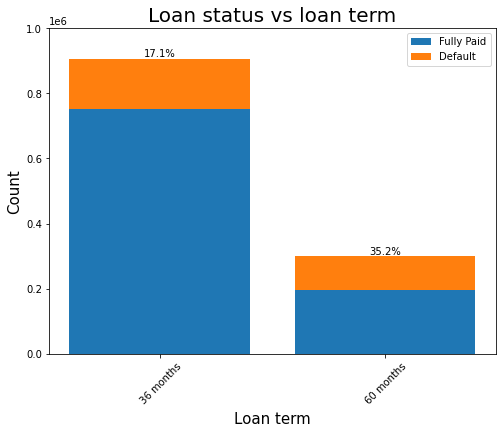

In [463]:
s = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', ['term']].value_counts(), 'Default': df.loc[df['new_status']=='Default', ['term']].value_counts()})
listIndex = s.index

new = []
for item in listIndex:
    new.append(''.join(item))
s.index = new

s['Total'] = s['Default'] + s['Fully Paid']

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(s.index, s['Fully Paid'])
ax.bar(s.index, s['Default'], bottom=s['Fully Paid'])
ax.set_xticklabels(s.index, rotation=45)
ax.legend(['Fully Paid', 'Default'])
ax.set_xlabel('Loan term', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_ylim(0,1002000)
ax.set_title("Loan status vs loan term", fontsize=20)


s_total=s['Total']
s = s.iloc[:, 0:2]
s_rel = s.div(s_total, 0)*100

n = 'Default'
for i, (cs, pc) in enumerate(zip(s.cumsum(1)[n], s_rel[n])):
    plt.text(i, cs, str(np.round(pc, 1)) + '%', va='bottom', ha='center')

plt.show()

### 7.8. Loan status distribution vs previous charged off, banckruptcies, collections and tax liens  <a class='anchor' id='tax'></a>

Another set of information that credit companies look for when they decide about loan application is the credit history of the applicants: previous collections, charged off accounts, [public record](https://pocketsense.com/public-records-credit-report-8005283.html) and [tax liens](https://www.irs.gov/businesses/small-businesses-self-employed/understanding-a-federal-tax-lien). As shown below, applicants who fail to pay their loan fully and those who pay their loan completely do not differ significantly in their credit history.

Text(0.5, 1.0, 'Loan status vs number of charged-off incidents within last 12 month')

<Figure size 432x288 with 0 Axes>

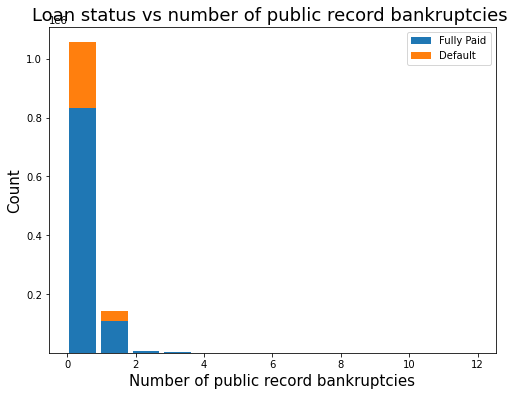

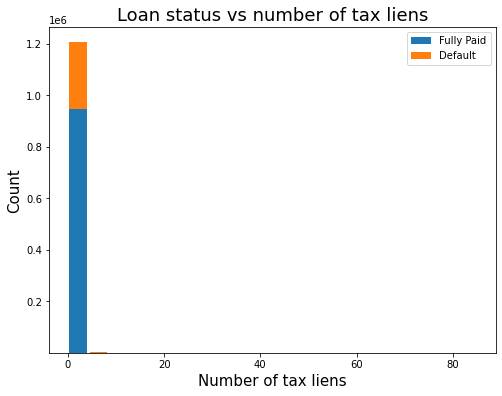

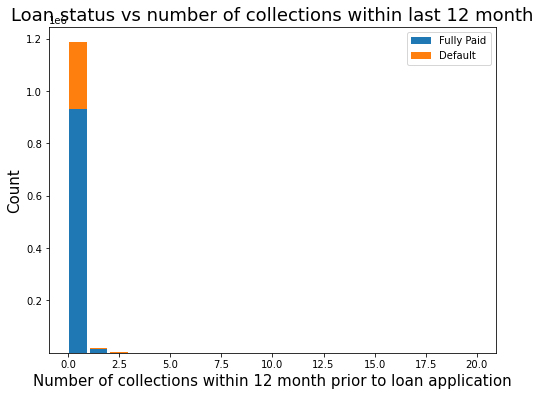

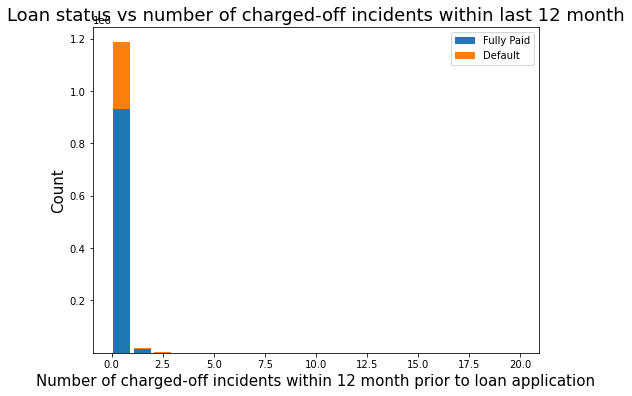

In [454]:
s1 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'pub_rec_bankruptcies'], 'Default': df.loc[df['new_status']=='Default', 'pub_rec_bankruptcies']}, index=None)
s2 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'tax_liens'], 'Default': df.loc[df['new_status']=='Default', 'tax_liens']}, index=None)
s3 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'collections_12_mths_ex_med'], 'Default': df.loc[df['new_status']=='Default', 'collections_12_mths_ex_med']}, index=None)
s4 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'chargeoff_within_12_mths'], 'Default': df.loc[df['new_status']=='Default', 'chargeoff_within_12_mths']}, index=None)


fig, axes = plt.subplots(4*1)
fig.clf()
axes[0] = s1.plot.hist(stacked=True, bins=13, rwidth=0.85, figsize=(8,6))
axes[1] = s2.plot.hist(stacked=True, bins=20, rwidth=0.85, figsize=(8, 6))
axes[2] = s3.plot.hist(stacked=True, bins=20, rwidth=0.85, figsize=(8, 6))
axes[3] = s3.plot.hist(stacked=True, bins=20, rwidth=0.85, figsize=(8, 6))

axes[0].legend(['Fully Paid', 'Default'])
axes[0].set_xlabel('Number of public record bankruptcies', fontsize=15)
axes[0].set_ylabel('Count', fontsize=15)
axes[0].set_title("Loan status vs number of public record bankruptcies ", fontsize=18)

axes[1].legend(['Fully Paid', 'Default'])
axes[1].set_xlabel('Number of tax liens', fontsize=15)
axes[1].set_ylabel('Count', fontsize=15)
axes[1].set_title('Loan status vs number of tax liens', fontsize=18)

axes[2].legend(['Fully Paid', 'Default'])
axes[2].set_xlabel('Number of collections within 12 month prior to loan application', fontsize=15)
axes[2].set_ylabel('Count', fontsize=15)
axes[2].set_title('Loan status vs number of collections within last 12 month', fontsize=18)

axes[3].legend(['Fully Paid', 'Default'])
axes[3].set_xlabel('Number of charged-off incidents within 12 month prior to loan application', fontsize=15)
axes[3].set_ylabel('Count', fontsize=15)
axes[3].set_title('Loan status vs number of charged-off incidents within last 12 month', fontsize=18)



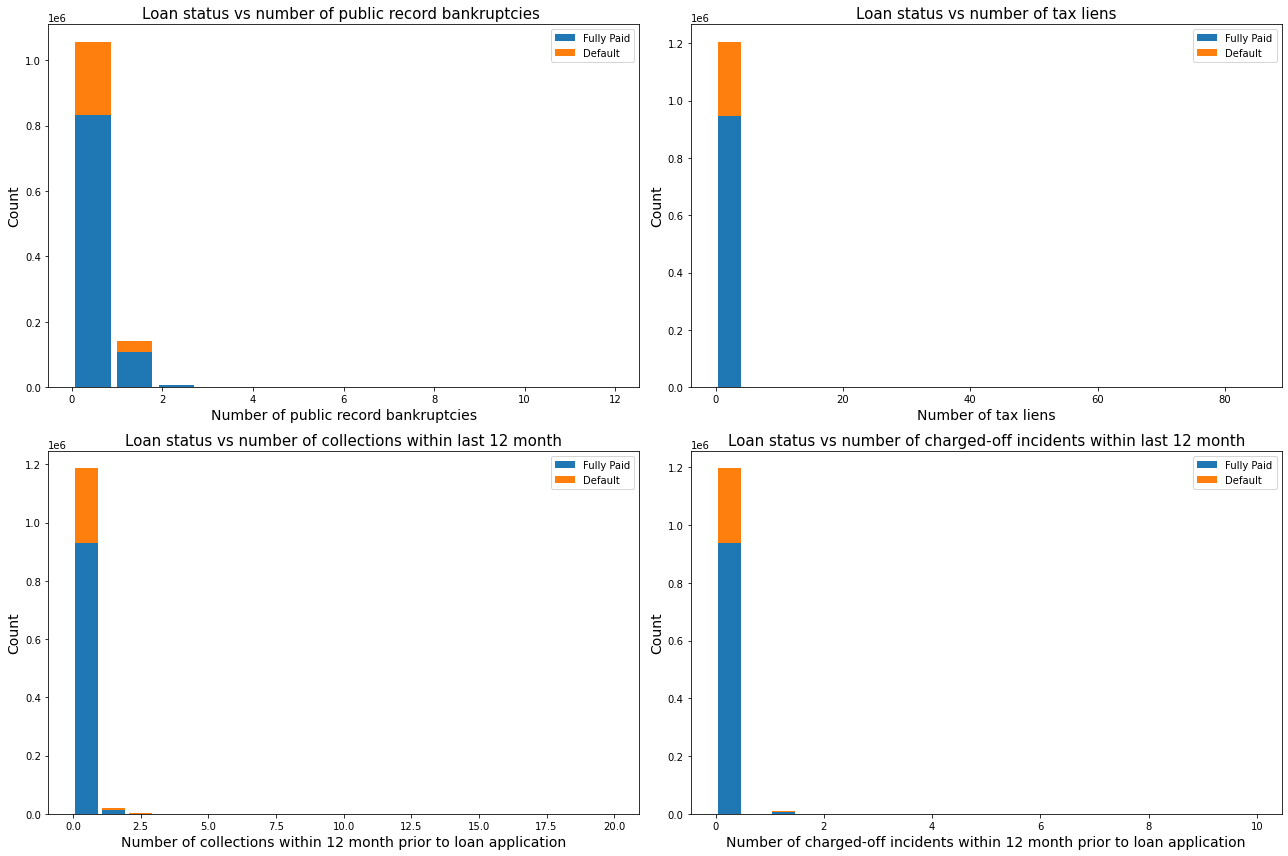

In [456]:
s1 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'pub_rec_bankruptcies'], 'Default': df.loc[df['new_status']=='Default', 'pub_rec_bankruptcies']}, index=None)
s2 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'tax_liens'], 'Default': df.loc[df['new_status']=='Default', 'tax_liens']}, index=None)
s3 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'collections_12_mths_ex_med'], 'Default': df.loc[df['new_status']=='Default', 'collections_12_mths_ex_med']}, index=None)
s4 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'chargeoff_within_12_mths'], 'Default': df.loc[df['new_status']=='Default', 'chargeoff_within_12_mths']}, index=None)


fig, [(axes0, axes1), (axes2, axes3)] = plt.subplots(nrows = 2, ncols = 2, figsize=(18,12))

axes0.hist(s1, stacked=True, bins=13, rwidth=0.85)
axes1.hist(s2, stacked=True, bins=20, rwidth=0.85)
axes2.hist(s3, stacked=True, bins=20, rwidth=0.85)
axes3.hist(s4, stacked=True, bins=20, rwidth=0.85)

axes0.legend(['Fully Paid', 'Default'])
axes0.set_xlabel('Number of public record bankruptcies', fontsize=14)
axes0.set_ylabel('Count', fontsize=14)
axes0.set_title("Loan status vs number of public record bankruptcies ", fontsize=15)

axes1.legend(['Fully Paid', 'Default'])
axes1.set_xlabel('Number of tax liens', fontsize=14)
axes1.set_ylabel('Count', fontsize=14)
axes1.set_title('Loan status vs number of tax liens', fontsize=15)

axes2.legend(['Fully Paid', 'Default'])
axes2.set_xlabel('Number of collections within 12 month prior to loan application', fontsize=14)
axes2.set_ylabel('Count', fontsize=14)
axes2.set_title('Loan status vs number of collections within last 12 month', fontsize=15)

axes3.legend(['Fully Paid', 'Default'])
axes3.set_xlabel('Number of charged-off incidents within 12 month prior to loan application', fontsize=14)
axes3.set_ylabel('Count', fontsize=14)
axes3.set_title('Loan status vs number of charged-off incidents within last 12 month', fontsize=15)
fig.tight_layout()
plt.show()


### 7.9. Loan status distribution vs utilization rate, revolving balance and inquires within 6 month of loan application  <a class='anchor' id='util'></a>

The next set of features that is investigated describe how an applicant uses their credit on the time of loan application. Features including [revolving balance](https://www.creditcards.com/credit-card-news/glossary/term-revolving-balance/#:~:text=In%20credit%20card%20terms%2C%20a%20revolving%20balance%20is,on%20the%20amount%20borrowed%20and%20the%20amount%20repaid.), the ratio of used credit to the credit limit, which is [utilization rate](https://www.experian.com/blogs/ask-experian/credit-education/score-basics/credit-utilization-rate/), and credit inquires are shown below. Apparently there is not signifant difference between defaulted and fully paid loans in this regard.

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

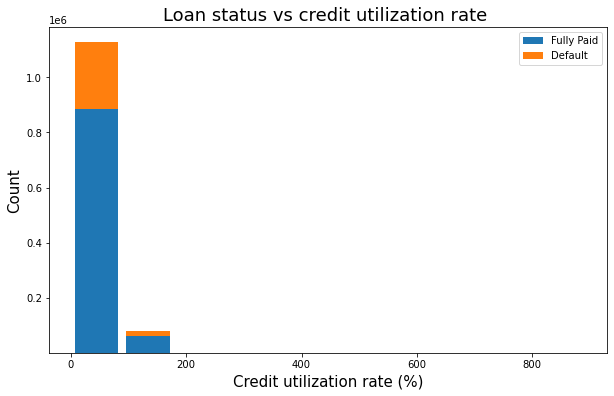

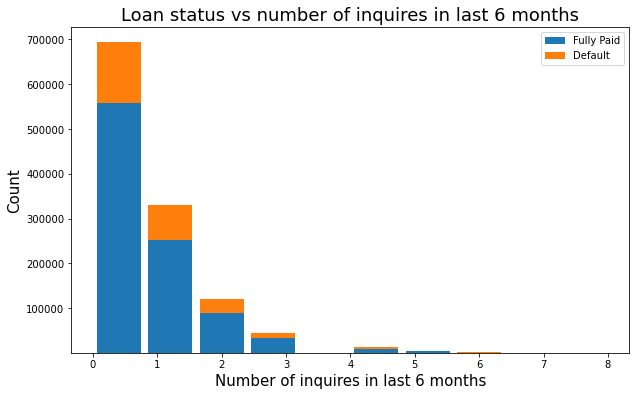

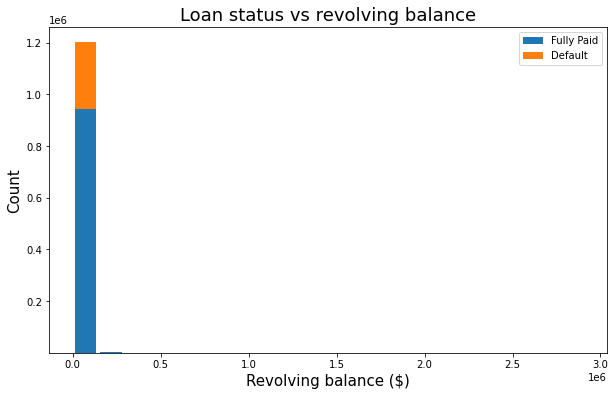

In [423]:
s1 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'revol_util'], 'Default': df.loc[df['new_status']=='Default', 'revol_util']}, index=None)
s2 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'inq_last_6mths'], 'Default': df.loc[df['new_status']=='Default', 'inq_last_6mths']}, index=None)
s3 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'revol_bal'], 'Default': df.loc[df['new_status']=='Default', 'revol_bal']}, index=None)

plt.figure()
fig, axes = plt.subplots(3,1) # create 3*1 array of subplots
fig.clf()
axes[0] = s1.plot.hist(stacked=True, bins=10, rwidth=0.85, figsize=(10, 6))
axes[1] = s2.plot.hist(stacked=True, bins=10, rwidth=0.85, figsize=(10, 6))
axes[2] = s3.plot.hist(stacked=True, bins=20, rwidth=0.85, figsize=(10, 6))

axes[0].legend(['Fully Paid', 'Default'])
axes[0].set_xlabel('Credit utilization rate (%)', fontsize=15)
axes[0].set_ylabel('Count', fontsize=15)
axes[0].set_title("Loan status vs credit utilization rate ", fontsize=18)

axes[1].legend(['Fully Paid', 'Default'])
axes[1].set_xlabel('Number of inquires in last 6 months', fontsize=15)
axes[1].set_ylabel('Count', fontsize=15)
axes[1].set_title('Loan status vs number of inquires in last 6 months', fontsize=18)

axes[2].legend(['Fully Paid', 'Default'])
axes[2].set_xlabel('Revolving balance ($)', fontsize=15)
axes[2].set_ylabel('Count', fontsize=15)
axes[2].set_title('Loan status vs revolving balance', fontsize=18)
plt.show()

### 7.10. Loan status distribution vs number of open accounts, mortages and number of revolving accounts  <a class='anchor' id='account'></a>

<ipython-input-471-032a5123e85d>:49: RuntimeWarning: invalid value encountered in double_scalars
  a = Y2/(Y2 + Y1)


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

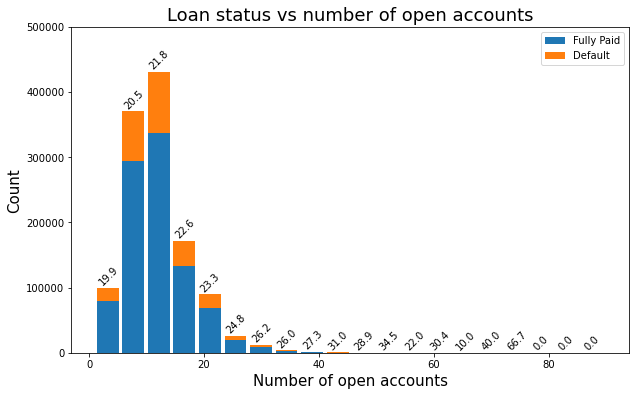

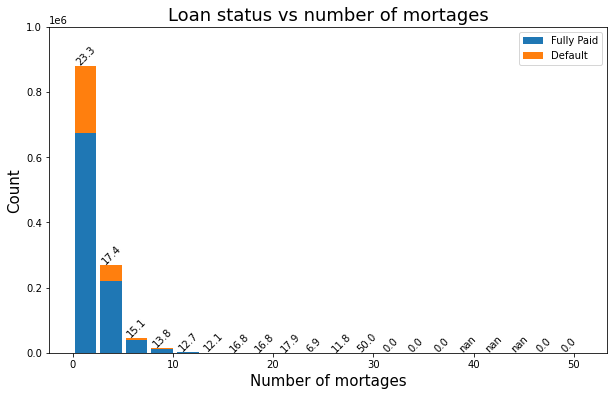

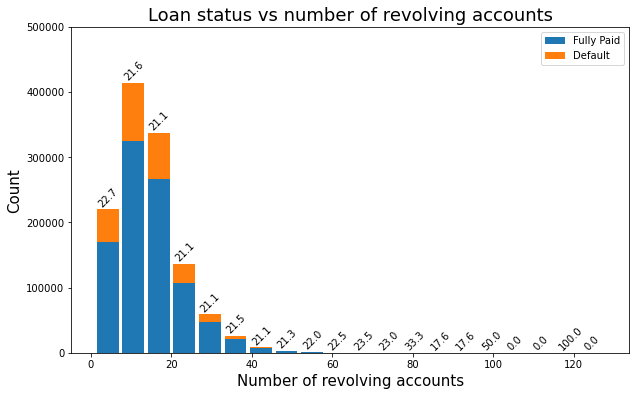

In [471]:
s1 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'open_acc'], 'Default': df.loc[df['new_status']=='Default', 'open_acc']}, index=None)
s2 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'mort_acc'], 'Default': df.loc[df['new_status']=='Default', 'mort_acc']}, index=None)
s3 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'num_rev_accts'], 'Default': df.loc[df['new_status']=='Default', 'num_rev_accts']}, index=None)

plt.figure()
fig, axes = plt.subplots(3,1) # create 3*1 array of subplots
fig.clf()
axes[0] = s1.plot.hist(stacked=True, bins=20, rwidth=0.85, figsize=(10, 6))
axes[1] = s2.plot.hist(stacked=True, bins=20, rwidth=0.85, figsize=(10, 6))
axes[2] = s3.plot.hist(stacked=True, bins=20, rwidth=0.85, figsize=(10, 6))

axes[0].legend(['Fully Paid', 'Default'])
axes[0].set_xlabel('Number of open accounts', fontsize=15)
axes[0].set_ylabel('Count', fontsize=15)
axes[0].set_title("Loan status vs number of open accounts", fontsize=18)
axes[0].set_ylim(0,500000)

axes[1].legend(['Fully Paid', 'Default'])
axes[1].set_xlabel('Number of mortages', fontsize=15)
axes[1].set_ylabel('Count', fontsize=15)
axes[1].set_title('Loan status vs number of mortages', fontsize=18)
axes[1].set_ylim(0,1000000)

axes[2].legend(['Fully Paid', 'Default'])
axes[2].set_xlabel('Number of revolving accounts', fontsize=15)
axes[2].set_ylabel('Count', fontsize=15)
axes[2].set_title('Loan status vs number of revolving accounts', fontsize=18)
axes[2].set_ylim(0,500000)

p = axes[0].patches
for i in range(0,20,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1 
    Y1 = p[i].get_height()
    Y2 = p[i+20].get_height()
    y = Y2 + Y1 + 4000 
    a = Y2/(Y2 + Y1)
    axes[0].text(x, y, round(a*100,1), rotation=45)
    
p = axes[1].patches
for i in range(0,20,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1 
    Y1 = p[i].get_height()
    Y2 = p[i+20].get_height()
    y = Y2 + Y1 + 4000
    a = Y2/(Y2 + Y1)
    axes[1].text(x, y, round(a*100,1), rotation=45)
    
p = axes[2].patches
for i in range(0,20,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1 
    Y1 = p[i].get_height()
    Y2 = p[i+20].get_height()
    y = Y2 + Y1 + 4000 
    a = Y2/(Y2 + Y1)
    axes[2].text(x, y, round(a*100,1), rotation=45)
    
plt.show()

### 7.11. Loan status distribution vs earliest credit  <a class='anchor' id='earliest'></a>

The length f an applicant credit history also effects terms of a loan application. To investigate the credit length, the eraliest credit time is available. pd.to_datetime fuction was used to conver this column to datetime and the diffence between this value and the loan issue day was found. As shown the credit length is not a significant indicator of the fate of a loan.

<ipython-input-474-387278d485b5>:19: RuntimeWarning: invalid value encountered in double_scalars
  a = Y2/(Y2 + Y1)


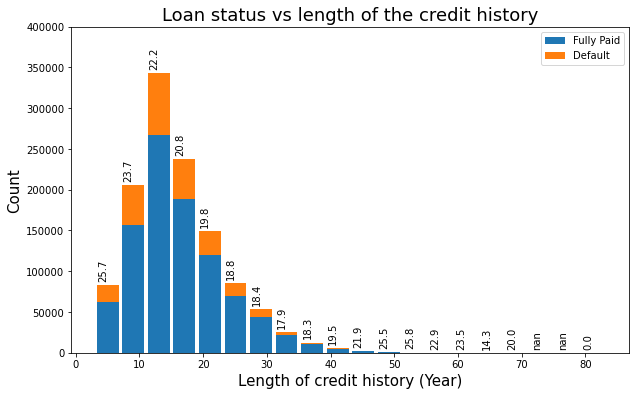

In [474]:
df['Credit Length (year)'] = (pd.to_datetime(df['issue_d'])-pd.to_datetime(df['earliest_cr_line']))/np.timedelta64(1,'Y')
s = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'Credit Length (year)'], 'Default': df.loc[df['new_status']=='Default', 'Credit Length (year)']}, index=None)
ax = s.plot.hist(stacked=True, bins=20, figsize=(10, 6), rwidth=0.85)

ax.legend(['Fully Paid', 'Default'])
ax.set_xlabel('Length of credit history (Year)', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title("Loan status vs length of the credit history", fontsize=18)
ax.set_ylim(0,400000)

p = ax.patches
for i in range(0,20,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1 +.2
    Y1 = p[i].get_height()
    Y2 = p[i+20].get_height()
    y = Y2 + Y1 + 7000
    a = Y2/(Y2 + Y1)
    plt.text(x, y, round(a*100,1), rotation=90)

### 7.12. DTI : debt to income ration <a class='anchor' id='dti'></a>

DTI, debt-to-income ratio, compares an applicant's total monthly debt obligations  to their monthly gross income, [dti,](https://www.lendingclub.com/loans/resource-center/calculating-debt-to-income) and as shown below defaulted loans have higher DTIs.

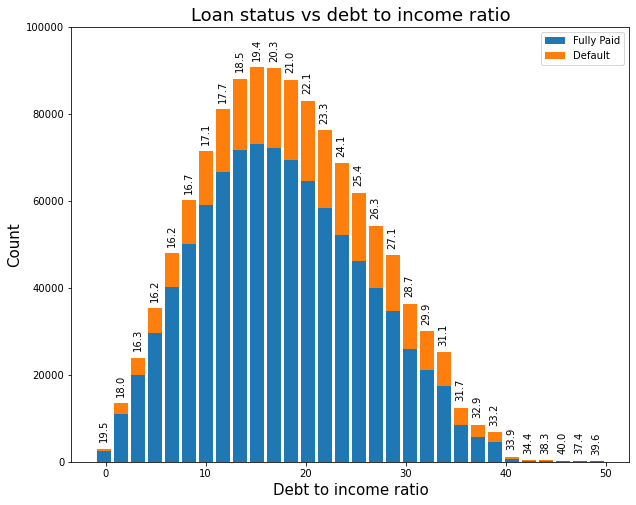

In [476]:
s = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'dti'], 'Default': df.loc[df['new_status']=='Default', 'dti']}, index=None)
ax = s.plot.hist(stacked=True, bins=30, figsize=(10, 8), rwidth=0.85)

ax.legend(['Fully Paid', 'Default'])
ax.set_xlabel('Debt to income ratio', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title("Loan status vs debt to income ratio", fontsize=18)
ax.set_ylim(0,100000)

p = ax.patches
heights = [patch.get_height() for patch in p]

for i in range(0,30,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1 +.2
    Y1 = p[i].get_height()
    Y2 = p[i+30].get_height()
    y = Y2 + Y1 + 2000
    a = Y2/(Y2 + Y1)
    plt.text(x, y, round(a*100,1), rotation=90)
plt.show()

## 8. Shall we treat states equally? Does the applicant's residential state affect their performance?  <a class='anchor' id='state'></a>

In order to find out if states are different, first the population of each state was found and the number of loans issued per 10,000 was estimated in each state. 
The the percentage of defaulted and fully paid loans per 10,000 were determined and shown in below figure.

<ipython-input-295-149768bb3e9f>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(s.index, rotation=45)


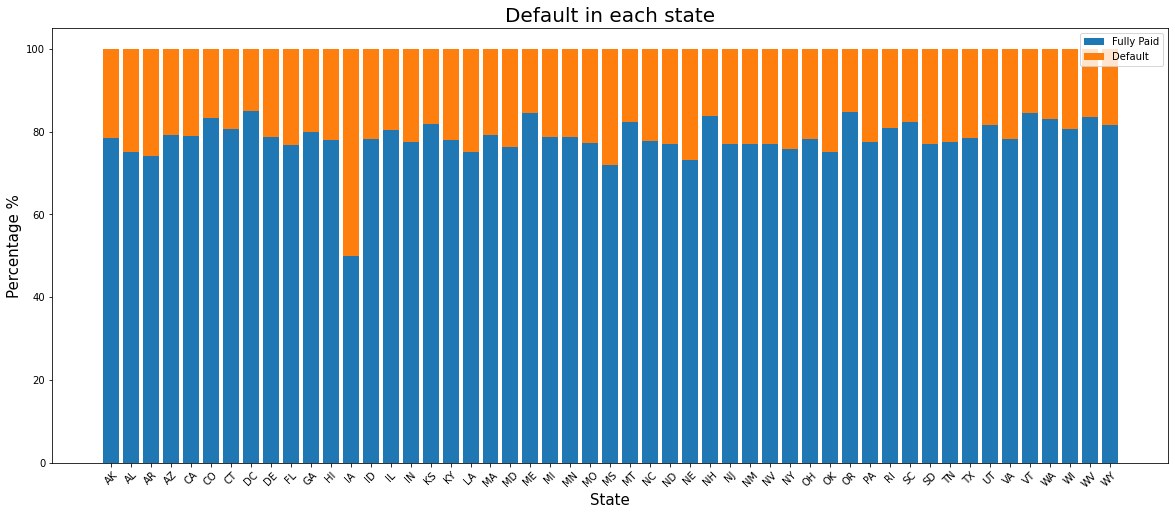

In [295]:
s = pd.DataFrame({'Default': df.loc[df['new_status']=='Default', ['addr_state']].value_counts(),
                  'Fully Paid': df.loc[df['new_status']=='Fully Paid', ['addr_state']].value_counts()})
listIndex = s.index
new = []
for item in listIndex:
    new.append(''.join(item))
s.index = new


s['Default%'] = s['Default']/(s['Default'] + s['Fully Paid'])*100
s['Fully Paid%'] = s['Fully Paid']/(s['Default'] + s['Fully Paid'])*100

fig, ax = plt.subplots(figsize=(20,8))
ax.bar(s.index, s['Fully Paid%'])
ax.bar(s.index, s['Default%'], bottom=s['Fully Paid%'])
ax.set_xticklabels(s.index, rotation=45)
ax.set_ylabel('Percentage %', fontsize=15)
ax.legend(['Fully Paid', 'Default'])
ax.set_xlabel('State', fontsize=15)
ax.set_title('Default in each state', fontsize=20)
plt.show()

As shown above, only one state Iowa has significantly higher percentage of defaulted loans. When looking closer, There are only two loans issued in this state, which is very small number.

In [30]:
s.loc[s.index=='IA', :]

,Default,Fully Paid,state,population,"Default_per_10,000","FullyPaid_per_10,000","Default%_per_10,000","FullyPaid%_per_10,000"
IA,1,1,Iowa,3104235.0,0.003221,0.003221,50.0,50.0


## 9. Principle Componenet Analysis <a class='anchor' id='pca'></a>

C:\Users\somfl\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Text(0.5, 1.0, 'summary PCA, 30.8% variance explained')

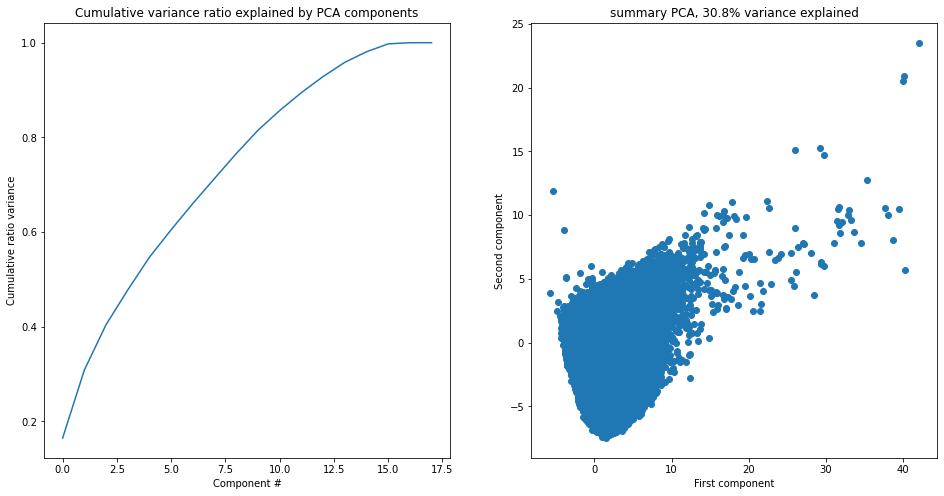

In [488]:
numeric_features = df.select_dtypes(np.number)
numeric_features.drop(columns=['issue_year', 'id'], inplace=True)
col_names = numeric_features.columns
numeric_features = scale(numeric_features)
numeric_scaled = pd.DataFrame(numeric_features, columns=col_names)
numeric_pca = PCA().fit(numeric_scaled)

fig, (axes0, axes1) =plt.subplots(nrows=1, ncols=2, figsize=(16,8))
axes0.plot(numeric_pca.explained_variance_ratio_.cumsum())
axes0.set_xlabel('Component #')
axes0.set_ylabel('Cumulative ratio variance')
axes0.set_title('Cumulative variance ratio explained by PCA components');


numeric_pca_x = numeric_pca.transform(numeric_scaled)
x = numeric_pca_x[:, 0]
y = numeric_pca_x[:, 1]

pc_var = 100 * numeric_pca.explained_variance_ratio_.cumsum()[1]
#plt.subplots(figsize=(10,8))
axes1.scatter(x=x, y=y)
axes1.set_xlabel('First component')
axes1.set_ylabel('Second component')
axes1.set_title(f'summary PCA, {pc_var:.1f}% variance explained')


Text(0.5, 1.0, 'summary PCA, 98.4% variance explained')

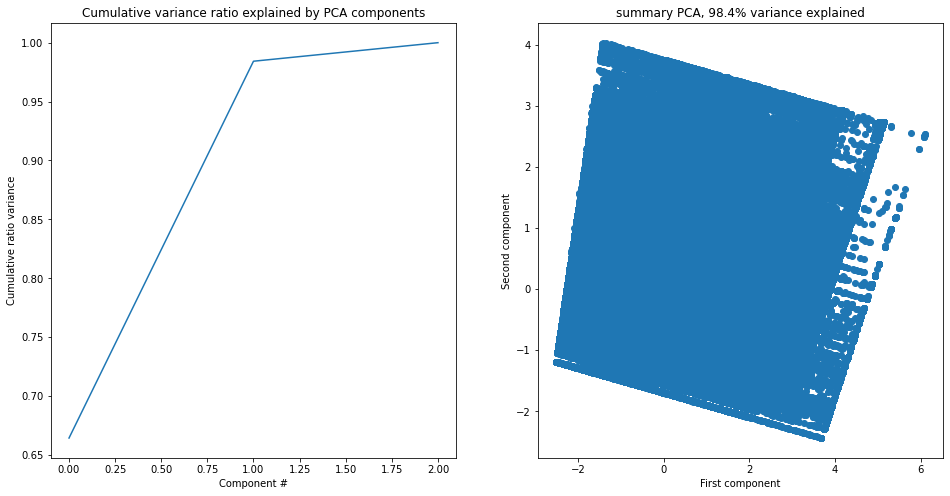

In [490]:
numeric_features = df[['installment', 'int_rate', 'funded_amnt']]
col_names = numeric_features.columns
numeric_features = scale(numeric_features)
numeric_scaled = pd.DataFrame(numeric_features, columns=col_names)
numeric_pca = PCA().fit(numeric_scaled)
fig, (axes0, axes1) =plt.subplots(nrows=1, ncols=2, figsize=(16,8))
axes0.plot(numeric_pca.explained_variance_ratio_.cumsum())
axes0.set_xlabel('Component #')
axes0.set_ylabel('Cumulative ratio variance')
axes0.set_title('Cumulative variance ratio explained by PCA components');


numeric_pca_x = numeric_pca.transform(numeric_scaled)
x = numeric_pca_x[:, 0]
y = numeric_pca_x[:, 1]

pc_var = 100 * numeric_pca.explained_variance_ratio_.cumsum()[1]
#plt.subplots(figsize=(10,8))
axes1.scatter(x=x, y=y)
axes1.set_xlabel('First component')
axes1.set_ylabel('Second component')
axes1.set_title(f'summary PCA, {pc_var:.1f}% variance explained')

Text(0.5, 1.0, 'summary PCA, 100.0% variance explained')

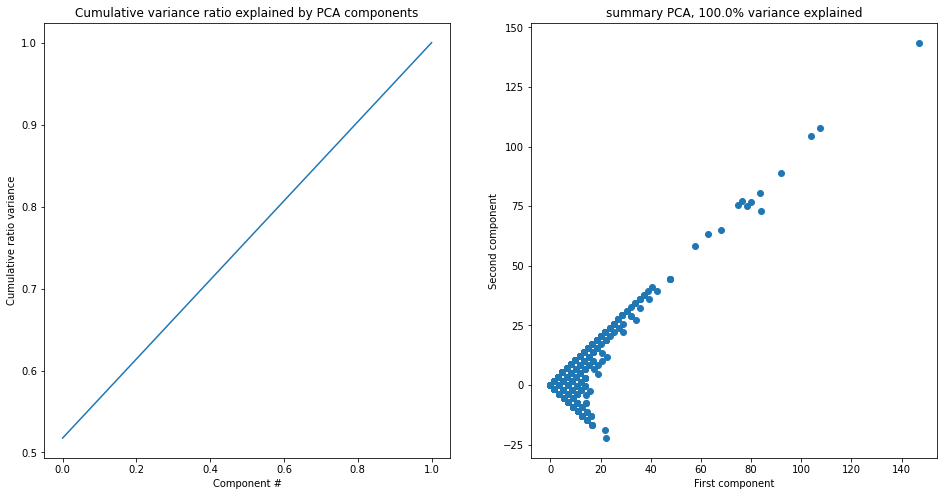

In [491]:
numeric_features = df[['pub_rec_bankruptcies', 'tax_liens']]
col_names = numeric_features.columns
numeric_features = scale(numeric_features)
numeric_scaled = pd.DataFrame(numeric_features, columns=col_names)
numeric_pca = PCA().fit(numeric_scaled)

fig, (axes0, axes1) =plt.subplots(nrows=1, ncols=2, figsize=(16,8))
axes0.plot(numeric_pca.explained_variance_ratio_.cumsum())
axes0.set_xlabel('Component #')
axes0.set_ylabel('Cumulative ratio variance')
axes0.set_title('Cumulative variance ratio explained by PCA components');


numeric_pca_x = numeric_pca.transform(numeric_scaled)
x = numeric_pca_x[:, 0]
y = numeric_pca_x[:, 1]

pc_var = 100 * numeric_pca.explained_variance_ratio_.cumsum()[1]
#plt.subplots(figsize=(10,8))
axes1.scatter(x=x, y=y)
axes1.set_xlabel('First component')
axes1.set_ylabel('Second component')
axes1.set_title(f'summary PCA, {pc_var:.1f}% variance explained')

Text(0.5, 1.0, 'summary PCA, 68.1% variance explained')

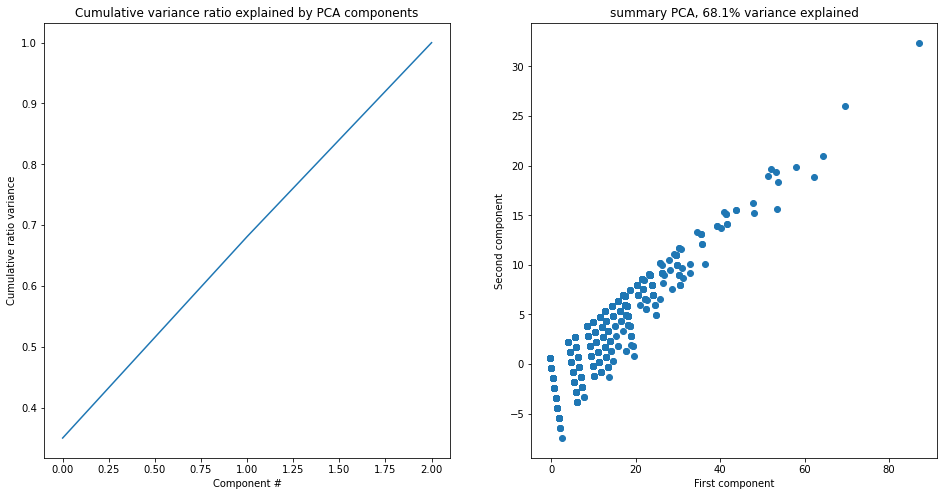

In [492]:
numeric_features = df[['chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'inq_last_6mths']]
col_names = numeric_features.columns
numeric_features = scale(numeric_features)
numeric_scaled = pd.DataFrame(numeric_features, columns=col_names)
numeric_pca = PCA().fit(numeric_scaled)

fig, (axes0, axes1) =plt.subplots(nrows=1, ncols=2, figsize=(16,8))
axes0.plot(numeric_pca.explained_variance_ratio_.cumsum())
axes0.set_xlabel('Component #')
axes0.set_ylabel('Cumulative ratio variance')
axes0.set_title('Cumulative variance ratio explained by PCA components');


numeric_pca_x = numeric_pca.transform(numeric_scaled)
x = numeric_pca_x[:, 0]
y = numeric_pca_x[:, 1]

pc_var = 100 * numeric_pca.explained_variance_ratio_.cumsum()[1]
#plt.subplots(figsize=(10,8))
axes1.scatter(x=x, y=y)
axes1.set_xlabel('First component')
axes1.set_ylabel('Second component')
axes1.set_title(f'summary PCA, {pc_var:.1f}% variance explained')

Text(0.5, 1.0, 'summary PCA, 88.5% variance explained')

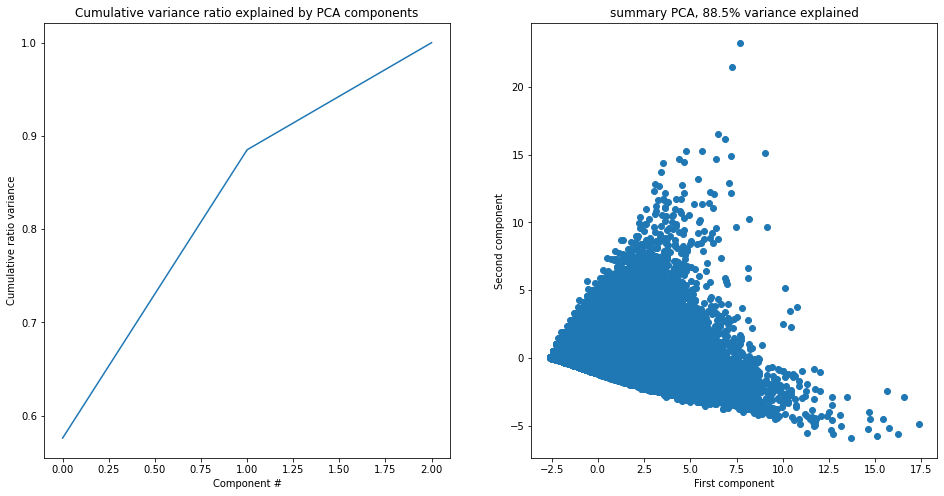

In [493]:
numeric_features = df[['open_acc', 'mort_acc', 'num_rev_accts']]
col_names = numeric_features.columns
numeric_features = scale(numeric_features)
numeric_scaled = pd.DataFrame(numeric_features, columns=col_names)
numeric_pca = PCA().fit(numeric_scaled)

fig, (axes0, axes1) =plt.subplots(nrows=1, ncols=2, figsize=(16,8))
axes0.plot(numeric_pca.explained_variance_ratio_.cumsum())
axes0.set_xlabel('Component #')
axes0.set_ylabel('Cumulative ratio variance')
axes0.set_title('Cumulative variance ratio explained by PCA components');


numeric_pca_x = numeric_pca.transform(numeric_scaled)
x = numeric_pca_x[:, 0]
y = numeric_pca_x[:, 1]

pc_var = 100 * numeric_pca.explained_variance_ratio_.cumsum()[1]
#plt.subplots(figsize=(10,8))
axes1.scatter(x=x, y=y)
axes1.set_xlabel('First component')
axes1.set_ylabel('Second component')
axes1.set_title(f'summary PCA, {pc_var:.1f}% variance explained')

Text(0.5, 1.0, 'summary PCA, 100.0% variance explained')

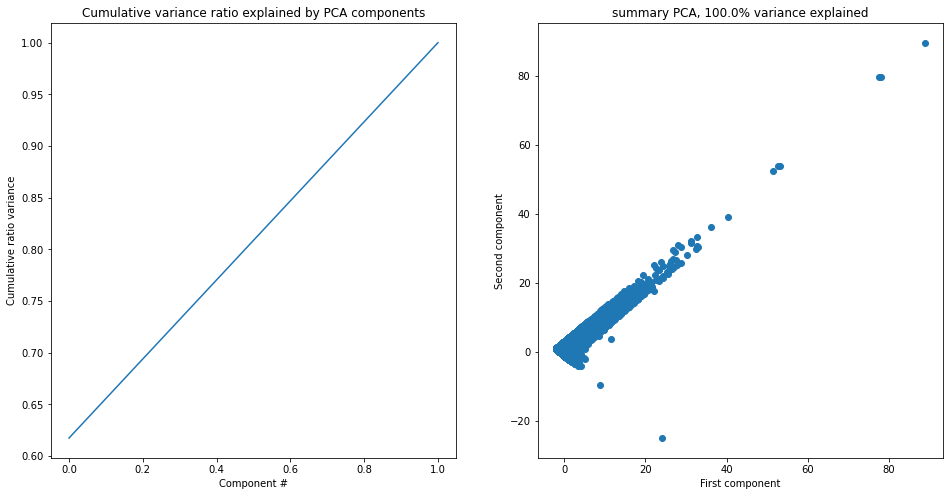

In [494]:
numeric_features = df[['revol_bal', 'revol_util']]
col_names = numeric_features.columns
numeric_features = scale(numeric_features)
numeric_scaled = pd.DataFrame(numeric_features, columns=col_names)
numeric_pca = PCA().fit(numeric_scaled)

fig, (axes0, axes1) =plt.subplots(nrows=1, ncols=2, figsize=(16,8))
axes0.plot(numeric_pca.explained_variance_ratio_.cumsum())
axes0.set_xlabel('Component #')
axes0.set_ylabel('Cumulative ratio variance')
axes0.set_title('Cumulative variance ratio explained by PCA components');


numeric_pca_x = numeric_pca.transform(numeric_scaled)
x = numeric_pca_x[:, 0]
y = numeric_pca_x[:, 1]

pc_var = 100 * numeric_pca.explained_variance_ratio_.cumsum()[1]
#plt.subplots(figsize=(10,8))
axes1.scatter(x=x, y=y)
axes1.set_xlabel('First component')
axes1.set_ylabel('Second component')
axes1.set_title(f'summary PCA, {pc_var:.1f}% variance explained')

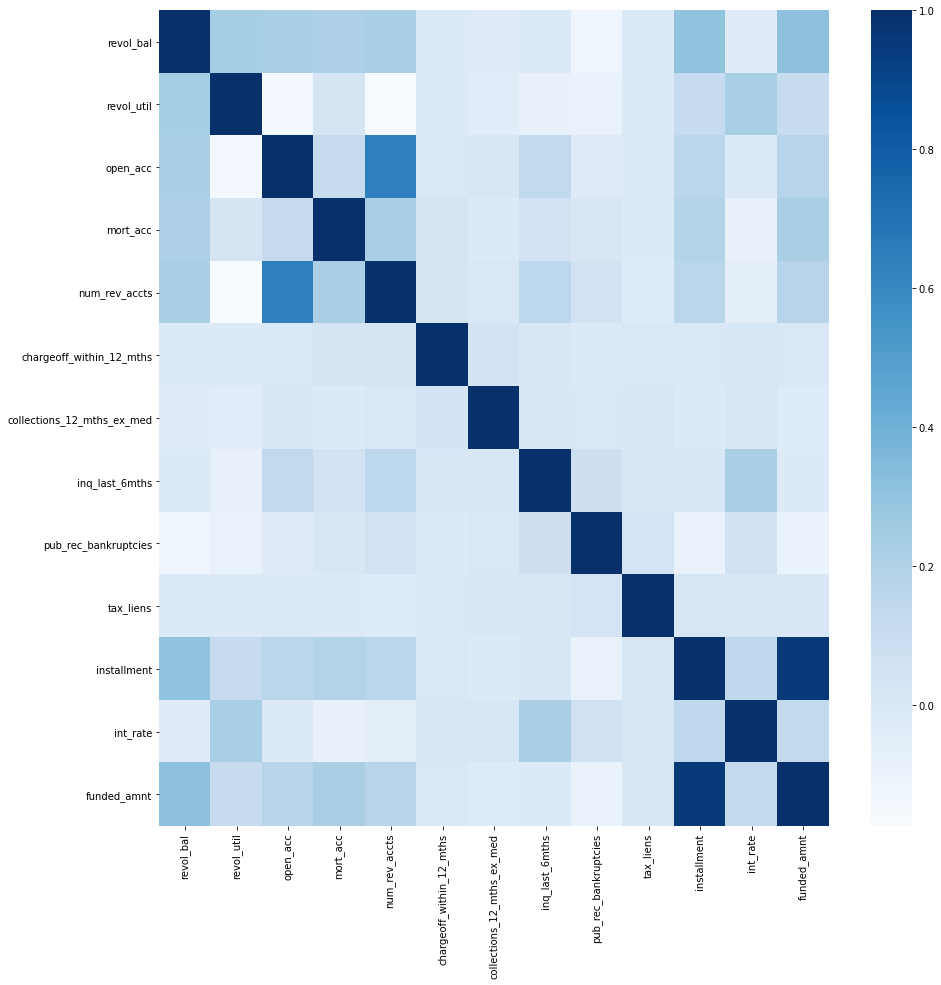

In [481]:
ddf = df[['revol_bal', 'revol_util', 'open_acc', 'mort_acc', 'num_rev_accts', 'chargeoff_within_12_mths', 
    'collections_12_mths_ex_med', 'inq_last_6mths', 'pub_rec_bankruptcies', 'tax_liens', 'installment', 'int_rate', 'funded_amnt']]
plt.subplots(figsize=(15,15))
sns.heatmap(ddf.corr(),cmap='Blues', fmt='g');

## 10. Summary  <a class='anchor' id='summary'></a>

Effects of various features on the loan status distribution were studied. Below is a summary of findings:

1. Applicans with more than 1o years of employment, are less likely to default on their loans. Also, applicants who live in  mortaged homes perform significantly better in returning their loans.


2. Applicants with higher credit scores are also better borrowers and it is shown that defaulted loans have applicants with lower credit scores. 


3. Previous charged off accounts or bankruptcies in applicants' credit history or the length of the applicant's credit history do not affect how a borrower performs on their loan return. Furthermore, the applicant's balance and how musch they use their credit on the time of application (ie utilization rate) do not affect how they return the loan. Also, the nuumbr of credit accounts or mortage accounts, applicants have is not a determinant in the fate of a loan. 


4. It is shown that defaulted loans have on average higher installment and interest rates, and they mostly have 60 month return period. It seems that loans with higher amounts that result in higher installment and longer terms are riskier.

5. DTI, debt-to-income ratio, compares an applicant's total monthly debt obligations to their monthly gross income and defaulted loans have higher DTIs.


6. We also checked to see if the state where an applicant lives affect how they perform on their loans. Applicants in different states are similar in their loan performance.